1. Classifier

In [98]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [99]:
df=pd.read_csv("iris.csv")
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [100]:
encoder=LabelEncoder()
df['species']=encoder.fit_transform(df['species'])
df

sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]

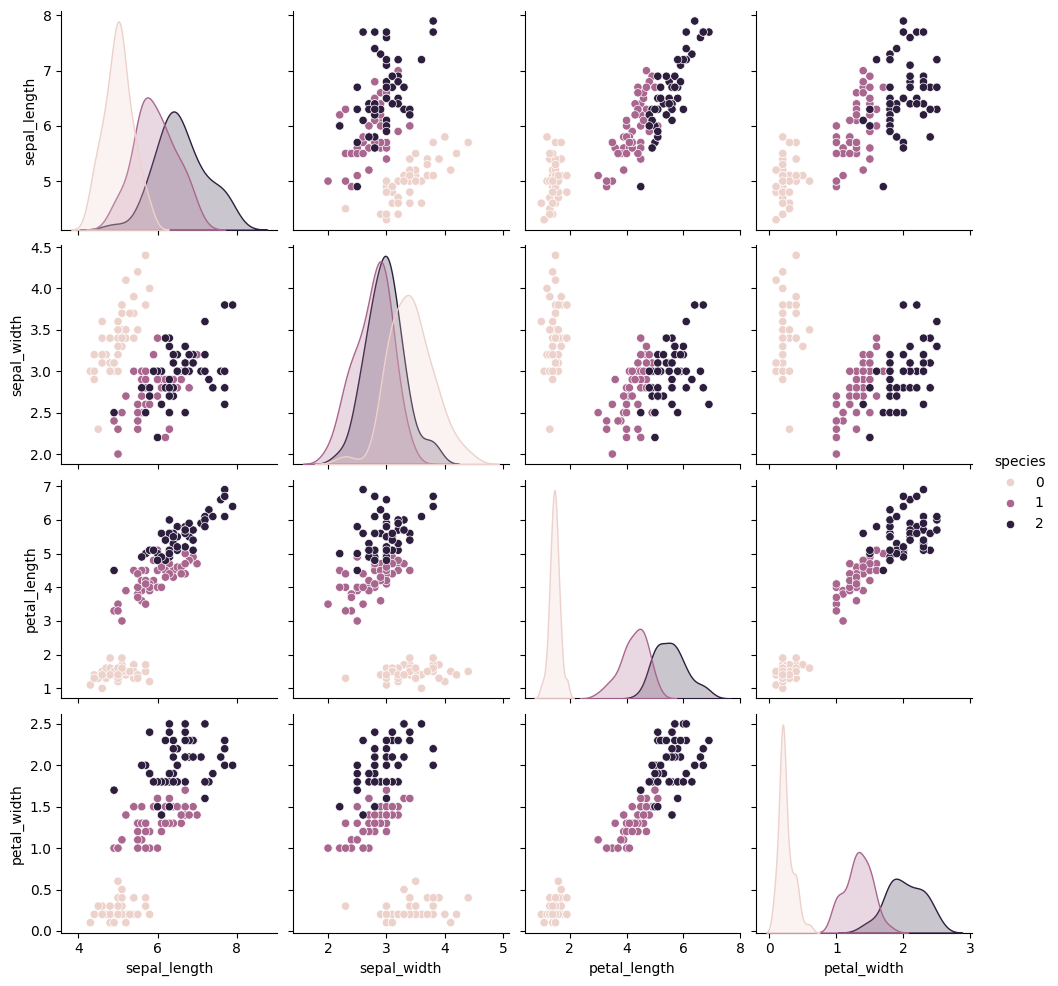

In [101]:
import seaborn as sns
sns.pairplot(df,hue='species')

In [102]:
new_df = df[df['species'] != 0][['sepal_length','sepal_width','species']]
new_df.head()


sepal_length  sepal_width  species
50           7.0          3.2        1
51           6.4          3.2        1
52           6.9          3.1        1
53           5.5          2.3        1
54           6.5          2.8        1

In [103]:
new_df.shape


(100, 3)

In [104]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.81
rf 0.72
knn 0.76


Hard voting

In [106]:
from sklearn.ensemble import VotingClassifier

vc=VotingClassifier(estimators=estimators,voting='hard')
x=cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))


0.77


Soft voting

In [107]:
vc=VotingClassifier(estimators=estimators,voting='soft')
x=cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.76


weight voting

In [108]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

for i=1,j=1,k=1 0.77
for i=1,j=1,k=2 0.76
for i=1,j=1,k=3 0.77
for i=1,j=2,k=1 0.75
for i=1,j=2,k=2 0.77
for i=1,j=2,k=3 0.75
for i=1,j=3,k=1 0.74
for i=1,j=3,k=2 0.73
for i=1,j=3,k=3 0.76
for i=2,j=1,k=1 0.78
for i=2,j=1,k=2 0.77
for i=2,j=1,k=3 0.77
for i=2,j=2,k=1 0.75
for i=2,j=2,k=2 0.76
for i=2,j=2,k=3 0.76
for i=2,j=3,k=1 0.75
for i=2,j=3,k=2 0.76
for i=2,j=3,k=3 0.77
for i=3,j=1,k=1 0.79
for i=3,j=1,k=2 0.79
for i=3,j=1,k=3 0.79
for i=3,j=2,k=1 0.77
for i=3,j=2,k=2 0.78
for i=3,j=2,k=3 0.76
for i=3,j=3,k=1 0.74
for i=3,j=3,k=2 0.76
for i=3,j=3,k=3 0.77


In [109]:
from sklearn.svm import SVC

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [110]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93


2. Reggressor

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()

estimators = [('lr',lr),('dt',dt),('svr',svr)]

In [112]:
for estimator in estimators:
  scores = cross_val_score(estimator[1],X,y,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))

lr 0.52
dt 0.02
svr 0.73


In [113]:
from sklearn.ensemble import VotingRegressor

vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,cv=10,scoring='r2')
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.6


In [114]:
for i in range(1,4):
  for j in range(1,4):
    for k in range(1,4):
      vr = VotingRegressor(estimators,weights=[i,j,k])
      scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
      print("For i={},j={},k={}".format(i,j,k),np.round(np.mean(scores),2))


For i=1,j=1,k=1 0.6
For i=1,j=1,k=2 0.65
For i=1,j=1,k=3 0.68
For i=1,j=2,k=1 0.51
For i=1,j=2,k=2 0.58
For i=1,j=2,k=3 0.64
For i=1,j=3,k=1 0.46
For i=1,j=3,k=2 0.53
For i=1,j=3,k=3 0.57
For i=2,j=1,k=1 0.6
For i=2,j=1,k=2 0.65
For i=2,j=1,k=3 0.68
For i=2,j=2,k=1 0.55
For i=2,j=2,k=2 0.59
For i=2,j=2,k=3 0.63
For i=2,j=3,k=1 0.5
For i=2,j=3,k=2 0.55
For i=2,j=3,k=3 0.59
For i=3,j=1,k=1 0.59
For i=3,j=1,k=2 0.64
For i=3,j=1,k=3 0.66
For i=3,j=2,k=1 0.55
For i=3,j=2,k=2 0.6
For i=3,j=2,k=3 0.63
For i=3,j=3,k=1 0.52
For i=3,j=3,k=2 0.56
For i=3,j=3,k=3 0.6


In [124]:
# using the same algorithm

dt1 = DecisionTreeRegressor(max_depth=1)
dt2 = DecisionTreeRegressor(max_depth=3)
dt3 = DecisionTreeRegressor(max_depth=5)
dt4 = DecisionTreeRegressor(max_depth=7)
dt5 = DecisionTreeRegressor(max_depth=None)

estimators = [('dt1',dt1),('dt2',dt2),('dt3',dt3),('dt4',dt4),('dt5',dt5)]

for name,model in estimators:
    scores=cross_val_score(model,X,y,scoring='r2',cv=10)
    print(name,np.round(np.mean(scores),2))

dt1 0.13
dt2 0.21
dt3 0.29
dt4 0.28
dt5 0.02


In [125]:

vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,cv=10,scoring='r2')
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.36
